# Project Group - 06

- Members:
    - Vincent, Yang
    - Eric, Zhang
    - Shenshen, Sun
    - Shuai, Wang


- Student numbers: 
    - 5703646
    - 5702615
    - 5704197
    - 5714532

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

In this project, we are very curious about the driving behavior of car drivers, so we model, optimize and analyze the vehicle following data from the ZTD data platform. We have chosen the following model algorithm and optimization algorithm as the goal of our course design. The car-following model algorithm adopts the intelligent driver model, and the optimization model chooses the genetic algorithm. 

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author Vincent Yang**:

**Author Eric Zhang**:

**Author Shenshen Sun**:

**Author Shuai Wang**:

# 1 IDM model

In this project, we will use the intelligent driver model with an explicit reaction time. Let’s indicate the mathematical framework. We will fit the driving trajectory of a real car driver based on the intelligent driver model (IDM), **Equation 1**.

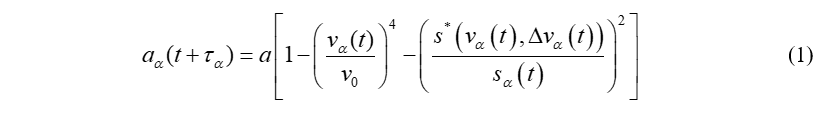

where we control the vehicle's driving state by the vehicle's acceleration $a_{\alpha}(t+\tau)$ at each moment $t$ and $\tau_{\alpha}$ denotes the driver's reaction time. $v_0$ denotes the free-flow speed of the vehicle and $S_{\alpha}(t)$ denotes the distance difference of the vehicle. s* is a distance consisting of three parts, given by the **Equation 2**:

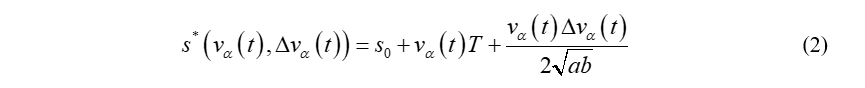

$s*$ can be interpreted as a reference distance, composed of a static and dynamic term. $S_0$ indicates the minimum parking distance, and the $v_{\alpha}(t)T$ represents the speed of vehicle multiplied by the expected time headway. The third component represents a safety distance based on the speed difference $\Delta$$v_{\alpha}(t)$, which indicates the distance a vehicle needs to travel without hitting the vehicle in front of it (without reaching b) during non-emergency braking. $a$ is the maximum acceleration of the vehicle, $b$ is the comfortable deceleration of the vehicle. 

We modeled it according to the formula above, the file name is ***Intelligent Driver Model for assignment1.py.***

# 2 Data Processing

*https://zen-traffic-data.net/english/*

The vehicle trajectory data selected in this assignment comes from the Zen Traffic Data platform (*https://zen-traffic-data.net/*), which collects the movement of all vehicles on Hanshin Expressway Route 11 that stretches for several kilometers at 0.1 second intervals. Most sections of this expressway kilometer have 2 lanes, respectively, the passing lane and the driving lane, and there is an extra merging lane when it meets the merging gate. 

The platform currently opens the track data of 3412 vehicles, We wrote a program(***Statistics information.py***) to count the number of rows in the raw data, and we also find the following time for every car(***find every car's time.py***), we got an average following time of 165.5 seconds. The data includes vehicle number, time, speed, lane,location, vehicle length and other information, it is worth noting that the vehicle length is rounded to 0.5 m. A portion of the Hanshin Expressway is shown in the figure below

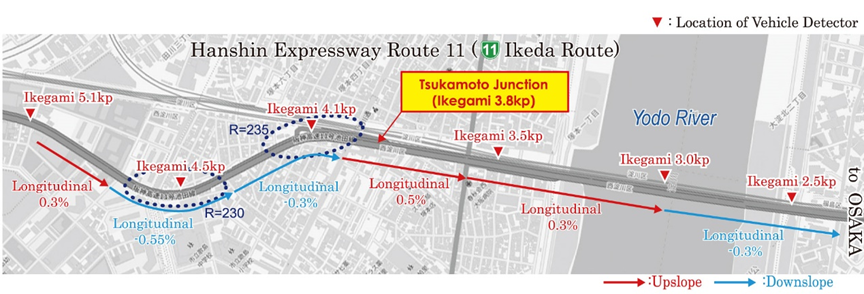

To apply the car-following model, it is first necessary to find out information about the vehicles in front and behind. Since the original data (***L001_F001_trajectory.csv***) does not have the pairing information of the front and rear vehicles, we first need to pair the original data. We use the R language pairing program (***find_leaders.R***) given on the website to pair the vehicles and remove them. All vehicles with a vehicle length greater than 6.5 meters (***Remove vehicles over 6.5 meters.py***), got 1793 paired vehicle information (***Paired_L001_F001_trajectory.csv***).

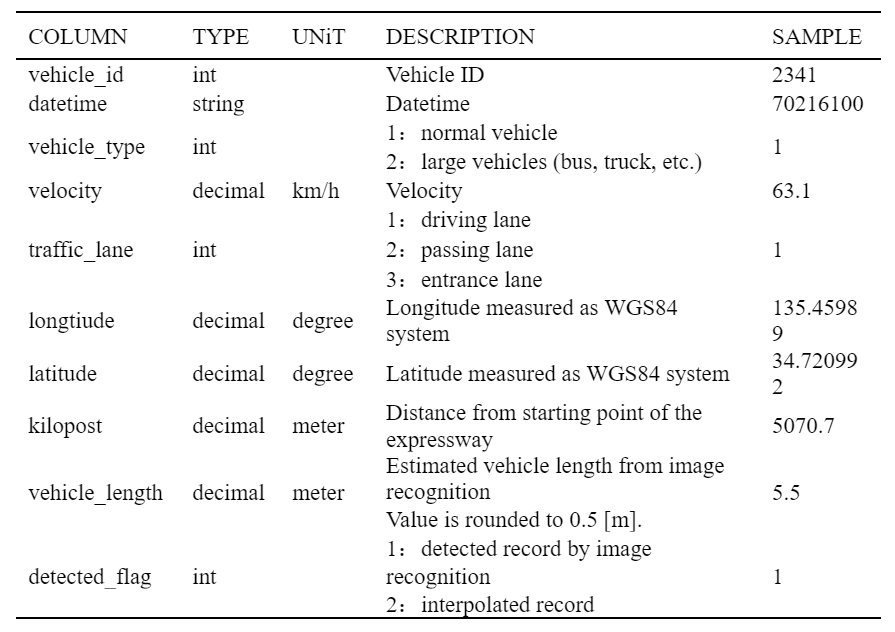

We use kilopost as the vehicle location information, however, kilopost is calculated from the latitude and longitude of the rear center position of the vehicle, and the vehicle spacing $S_{\alpha}$ in the intelligent driver model is the distance from the rear of the previous vehicle to the front of the following vehicle, so the formula for calculating $S_{\alpha}$ in this assignment is shown in **Equation 3**.

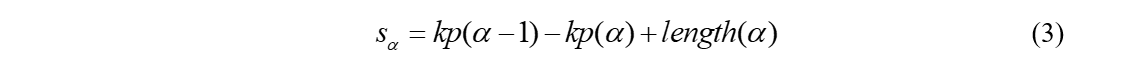

where $ \alpha $ is the current vehicle, $ \alpha-1 $ is the previous vehicle, $kp$ denotes kilopost, and $length$ denotes vehicle length.


# 3 Genetic Algorithm

We need to calibrate the model parameters of 1793 vehicles based on the improved intelligent driver model. 

To this end, we use a genetic algorithm(***genetic algorithm.py***). We do so to fit the five parameters in the intelligent driver model, namely $S_0, T, a, b, v_0$ representing the driving behavior of the drivers. We use a library called geatpy, which has a built-in genetic algorithm kernel, and we need to set the parameters of the genetic algorithm.

The parameters are represented by a set of real numbers, and the quality of the model with these parameters by a value indicating the goodness of fit for the model with the parameter set. In this assignment, we chose to calculate the variation between the predicted car trajectory and the measured car trajectory as the root mean squared error between the measured position $y_{measured}(t)$ and predicted position $y_{IDM}(t)$, as indicated in **Equation 4**:

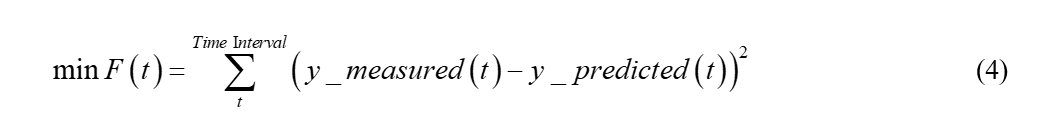

After determining the coding method and the fitness equation, we optimize the parameter set using a genetic algorithm. 

For generating a next generation, we used the elite retention method. The initial generation was randomly generated within the range of values of each parameter. The population size was 20 individuals. 

After that, we choose to use the two-point crossover method for the recombination of the parameter set with a recombination probability of 0.7. We use the variation operator of breeder GA as the variation algorithm for the parameter set. We set the variation probability to 1/decision variable dimensions.

Since there are five decision variables in total, we set the variation probability to 0.2. We set the condition for the termination of the algorithm to reach 50 evolutionary generations. 

At the end, we do check the quality of the optimized result (see next subsection). Finally, we have to set a range for the calibration parameters to improve the calculation speed of the algorithm and to let the parameters fall within a reasonable interval, so we have to set a range for the five parameters to be calibrated, and the parameters are taken as follows.

$S_0: 1-8 m$

$T: 0.5-5 s$

$a: 0.5-6 m/s^2$

$b: 0.5-6 m/s^2$

$v_0: 0-50 m/s$

Now we have the value of the objective function and also the travel time of each vehicle, so we can calculate the error of each vehicle, we choose to eliminate the vehicles with an error greater than 10, and finally we get the data of 1231 vehicles(***result.csv***), also It's the driver's driving habits.

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Result data
file_path = ".\\result.csv"
df = pd.read_csv(file_path, delimiter=',')
df

S         T      aMax      bMax         v0   least square    id  \
0     7.068824  1.160274  1.119538  4.133713  21.872616    1445.437292  3454   
1     2.700226  1.699020  2.104446  2.820480  21.620178    1686.100051  3502   
2     2.095893  1.755600  1.314833  3.444540  47.499037    1819.653283  3423   
3     2.353956  0.579338  4.653707  3.689097  41.827202    2315.541396  3419   
4     7.196570  1.325065  1.201248  0.500000  22.195339    2419.537743  3450   
...        ...       ...       ...       ...        ...            ...   ...   
1226  3.118927  1.582977  5.083557  1.203949  32.418823  113073.895500   145   
1227  1.218109  2.281021  3.603653  4.311798  31.980896  153401.887700   865   
1228  3.419281  1.898834  4.532684  5.868576  41.221619  178294.031400  1066   
1229  1.267029  1.875076  3.209045  0.974838  48.649597  160292.877100   987   
1230  5.463654  1.319717  1.216370  3.205185  21.878052  111647.786400   751   

      length  type  leader_id  leader_type  front_length  group  times  \
0        4.0     1       2376            2           7.5      1    713   
1        4.5     1       2763            2           8.5      2    701   
2        4.5     1       2041            1           5.5      2    746   
3        4.0     1       2008            1           4.5      1    877   
4        4.0     1       2923            1           3.5      1    768   
...      ...   ...        ...          ...           ...    ...    ...   
1226     3.5     1        143            1           4.0      1   1148   
1227     3.5     1        862            1           4.5      1   1548   
1228     4.0     1       1065            1           3.5      1   1794   
1229     4.5     1        985            2          11.5      2   1612   
1230     4.0     1        749            2           7.0      1   1119   

         error  
0     1.423819  
1     1.550896  
2     1.561798  
3     1.624899  
4     1.774948  
...        ...  
1226  9.924536  
1227  9.954739  
1228  9.969128  
1229  9.971824  
1230  9.988724  

[1231 rows x 15 columns]

# 4 Basic Analysis

### 4.1 First, visualize the results of the above data

In [3]:
fig = px.scatter_3d(df, x='T', y='v0', z='aMax', color='length')
fig.show()

### 4.2 Then, we want to know the number of front vehicles in different length types.

In [4]:
# Each vehicle is marked with number = 1
df.insert(df.shape[1], 'number', 1)
df

S         T      aMax      bMax         v0   least square    id  \
0     7.068824  1.160274  1.119538  4.133713  21.872616    1445.437292  3454   
1     2.700226  1.699020  2.104446  2.820480  21.620178    1686.100051  3502   
2     2.095893  1.755600  1.314833  3.444540  47.499037    1819.653283  3423   
3     2.353956  0.579338  4.653707  3.689097  41.827202    2315.541396  3419   
4     7.196570  1.325065  1.201248  0.500000  22.195339    2419.537743  3450   
...        ...       ...       ...       ...        ...            ...   ...   
1226  3.118927  1.582977  5.083557  1.203949  32.418823  113073.895500   145   
1227  1.218109  2.281021  3.603653  4.311798  31.980896  153401.887700   865   
1228  3.419281  1.898834  4.532684  5.868576  41.221619  178294.031400  1066   
1229  1.267029  1.875076  3.209045  0.974838  48.649597  160292.877100   987   
1230  5.463654  1.319717  1.216370  3.205185  21.878052  111647.786400   751   

      length  type  leader_id  leader_type  front_length  group  times  \
0        4.0     1       2376            2           7.5      1    713   
1        4.5     1       2763            2           8.5      2    701   
2        4.5     1       2041            1           5.5      2    746   
3        4.0     1       2008            1           4.5      1    877   
4        4.0     1       2923            1           3.5      1    768   
...      ...   ...        ...          ...           ...    ...    ...   
1226     3.5     1        143            1           4.0      1   1148   
1227     3.5     1        862            1           4.5      1   1548   
1228     4.0     1       1065            1           3.5      1   1794   
1229     4.5     1        985            2          11.5      2   1612   
1230     4.0     1        749            2           7.0      1   1119   

         error  number  
0     1.423819       1  
1     1.550896       1  
2     1.561798       1  
3     1.624899       1  
4     1.774948       1  
...        ...     ...  
1226  9.924536       1  
1227  9.954739       1  
1228  9.969128       1  
1229  9.971824       1  
1230  9.988724       1  

[1231 rows x 16 columns]

In [5]:
# Sorting vehicles of different lengths
df_4 = df.groupby("front_length").agg({"number": sum})
df_4

number
front_length        
3.0              172
3.5              245
4.0              399
4.5              219
5.0               19
5.5               18
6.0                9
6.5               25
7.0               11
7.5               10
8.0               10
8.5               12
9.0               15
9.5                5
10.0               4
10.5               6
11.0              15
11.5              21
12.0              10
12.5               2
13.0               2
13.5               2

In [6]:
fig = px.bar(df_4, x=df_4.index, y="number", text_auto=True)
fig.update_traces(textposition = "outside")
fig.show()

### 4.3 Box figure on relationship between Expected Time Headway(T) and Front Car Length

In [7]:
fig = px.box(df, x="front_length", y="T")
fig.show()

When the front vehicle length is between 3 and 6.5m, the expected time headway($T$) is more stable, with values fluctuating between approximately 1.30 and 1.50.

When the front vehicle length is greater than 6.5m, the expected time headway($T$) fluctuates greatly, indicating that the driver is unable to accurately determine the distance to the front vehicle.

### 4.4 Box figure on relationship between Expected Time Headway(T) and Car Length

In [8]:
fig = px.box(df, x="length", y="T", color='length')
fig.show()

A general trend can be drawn that the longer the length of the car the driver is driving, the expected time headway($T$) becomes greater.

And according to the data results, when the car length is 5.5m, the expected time headway($T$) is most unstable, with a large distribution range(1.27s to 3.12s).

### 4.5 Relationship between Expected Time Headway(T) and vehicle length

In [9]:
# T(Expected Time Headway) and Length Figure
fig = px.scatter(df, x="length", y="T", trendline="ols")

model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]
fig.data[0].name = 'data point'
fig.data[0].showlegend = True
fig.data[1].name = fig.data[1].name + 'y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
fig.data[1].showlegend = True

fig.show()

**According to the regression line, it can be seen that for every meter increase in the length of the car, the expected time teadway (T) increases by 0.2s.**

### 4.6 Pick car No.45 and drow its trendline on acceleration

In [10]:
file_path_45 = ".\IDMdata_for_45.csv"
df_45 = pd.read_csv(file_path_45, delimiter=',')

a = []
for i in range(0, len(df_45), 20):
    a.append(i)
file_45 = df_45.iloc[a]
file_45

Unnamed: 0   Velocity  Acceleration  front car position  \
0              5  22.083333      1.197868              5013.3   
20            25  23.118247     -0.196055              4965.0   
40            45  22.512502     -0.901774              4921.4   
60            65  22.107790     -0.048463              4881.5   
80            85  21.317817     -0.812781              4840.6   
100          105  20.954422     -0.415862              4802.0   
120          125  20.154522     -1.066362              4761.3   
140          145  19.996274      0.007225              4721.4   
160          165  20.508522     -0.002056              4679.4   
180          185  20.378130     -0.234547              4639.4   
200          205  20.468841      0.430020              4598.4   
220          225  20.619558     -0.133235              4556.0   
240          245  21.289919     -0.289163              4510.8   
260          265  20.930060     -0.378803              4467.1   
280          285  20.956666      0.336937              4421.5   
300          305  21.440629     -0.240220              4380.0   
320          325  20.671536      0.579729              4341.9   
340          345  19.990073     -0.689199              4305.8   
360          365  20.015200      0.164555              4264.3   
380          385  20.163644     -0.174391              4221.3   
400          405  20.850204      0.064595              4182.7   
420          425  21.172419      1.055524              4137.6   
440          445  20.392953     -1.962937              4097.7   
460          465  19.917248     -0.239796              4058.6   
480          485  19.819847     -0.507157              4018.8   
500          505  19.890008      0.202378              3980.8   
520          525  19.728980     -0.619193              3943.3   
540          545  19.945782     -0.677604              3905.2   
560          565  20.367219     -0.376969              3866.0   
580          585  19.984638     -1.044514              3828.8   
600          605  19.538223     -0.839123              3789.6   
620          625  20.364766      0.729353              3746.4   
640          645  20.336822     -0.360694              3708.6   
660          665  19.677632      0.469789              3669.6   
680          685  19.075934     -0.211178              3630.7   
700          705  18.189714      1.006257              3598.1   
720          725  18.150366      0.376834              3560.0   
740          745  17.712193      0.132837              3525.4   
760          765  17.738428     -0.870324              3488.3   
780          785  17.601073      0.644647              3446.7   
800          805  17.175957     -0.554021              3414.5   
820          825  16.321673      0.159332              3381.9   
840          845  15.412308      1.769622              3358.8   
860          865  15.894708      0.424552              3325.0   
880          885  16.929529     -0.473399              3286.4   
900          905  17.351491      0.402146              3250.0   
920          925  18.667135      0.759388              3208.8   
940          945  19.168155     -0.322739              3171.4   
960          965  18.369076     -0.022981              3133.5   
980          985  17.547516     -1.548931              3100.6   
1000        1005  16.782025     -0.555282              3069.0   
1020        1025  16.282124      1.226687              3037.5   

      following car position   time  
0                     5054.8    0.5  
20                    5009.5    2.5  
40                    4962.5    4.5  
60                    4918.0    6.5  
80                    4875.8    8.5  
100                   4830.4   10.5  
120                   4790.4   12.5  
140                   4746.2   14.5  
160                   4705.3   16.5  
180                   4663.0   18.5  
200                   4621.9   20.5  
220                   4580.9   22.5  
240                   4534.8   24.5  
260                   4489.3

In [11]:
fig_45 = px.scatter(file_45, x='time', y="Acceleration", trendline="lowess", trendline_options=dict(frac=0.1))
fig_45.show()

### 4.7 Time and space map of car No.45 and its front car

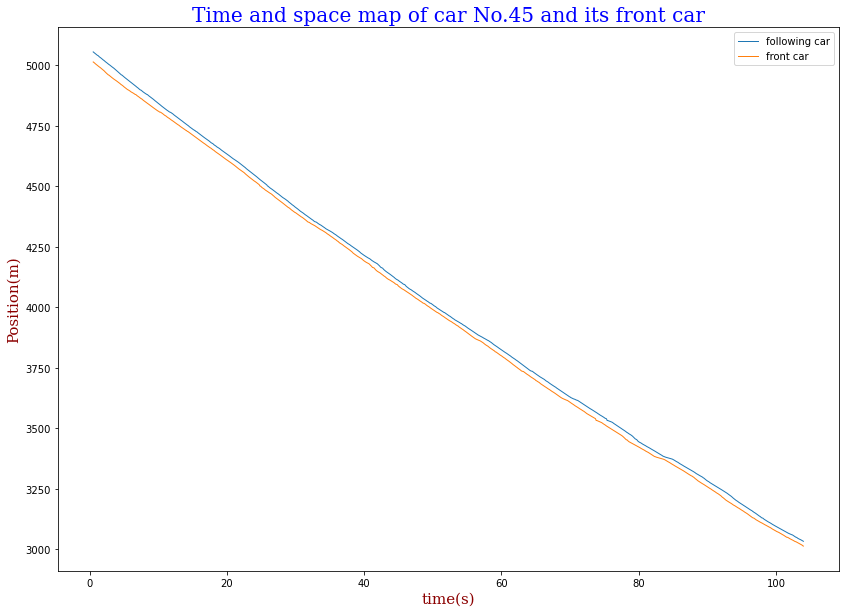

In [12]:
# Draw picture about time and space map of car No.45 and its front car
x=df_45['time']  
y1=df_45['following car position']
y2=df_45['front car position']

plt.figure(figsize=(14,10))
l1,=plt.plot(x,y1,linewidth=1)
l2,=plt.plot(x,y2,linewidth=1)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.legend((l1,l2,),['following car','front car'])
plt.title("Time and space map of car No.45 and its front car", fontdict=font1)
plt.xlabel("time(s)", fontdict=font2)
plt.ylabel("Position(m)", fontdict=font2)
#
plt.show()